# Read initial model and plot velocity in horizontal section

In [1]:
from pytomoatt.model import ATTModel
import numpy as np
# initial model hdf5 file
initial_model_file = '../0_generate_files_for_TomoATT/2_models/model_init_N61_61_61.h5'
# input parameters file
par_file = 'input_params/input_params_inv_abs.yaml'

# read model file by pytomoatt
model = ATTModel.read(initial_model_file, par_file)
initial_model = model.to_xarray()

# we can access the velocity at arbitrary depth
all_depth = [10.0, 30.0]
all_dep_sec = [initial_model.interp_dep(depth, field='vel') for depth in all_depth]


# we can also access the velocity at arbitrary vertical profile
all_start = [
    [30.0, 30.5],
    [30.5, 30.0],
]
all_end = [
    [32.0, 30.5],
    [30.5, 32.0],
]

sec_lon, sec_lat, sec_dis, sec_dep, sec_vel = [], [], [], [], []

for start, end in zip(all_start, all_end):
    tmp = initial_model.interp_sec(start, end, field='vel', val=1)
    print("The shape of initial model array is", tmp.shape)
    sec_lon.append(tmp[:, 0])
    sec_lat.append(tmp[:, 1])
    sec_dis.append(tmp[:, 2])
    sec_dep.append(tmp[:, 3])
    sec_vel.append(tmp[:, 4])

The shape of initial model array is (11712, 5)
The shape of initial model array is (13542, 5)


/home/xumj/Codes/miniconda3/lib/python3.12/site-packages/pyproj/geod.py:829: UserWarning: Back azimuth is being returned by default to be compatible with inv()This is a breaking change for pyproj 3.5+.To avoid this warning, set return_back_azimuth=True.Otherwise, to restore old behaviour, set return_back_azimuth=False.This warning will be removed in future version.
  warnings.warn(


# Pygmt plot

surface [WARNING]: 3280 unusable points were supplied; these will be ignored.
surface [WARNING]: You should have pre-processed the data with block-mean, -median, or -mode.
surface [WARNING]: Check that previous processing steps write results with enough decimals.
surface [WARNING]: Possibly some data were half-way between nodes and subject to IEEE 754 rounding.
surface [WARNING]: Input data lie exactly on a plane.


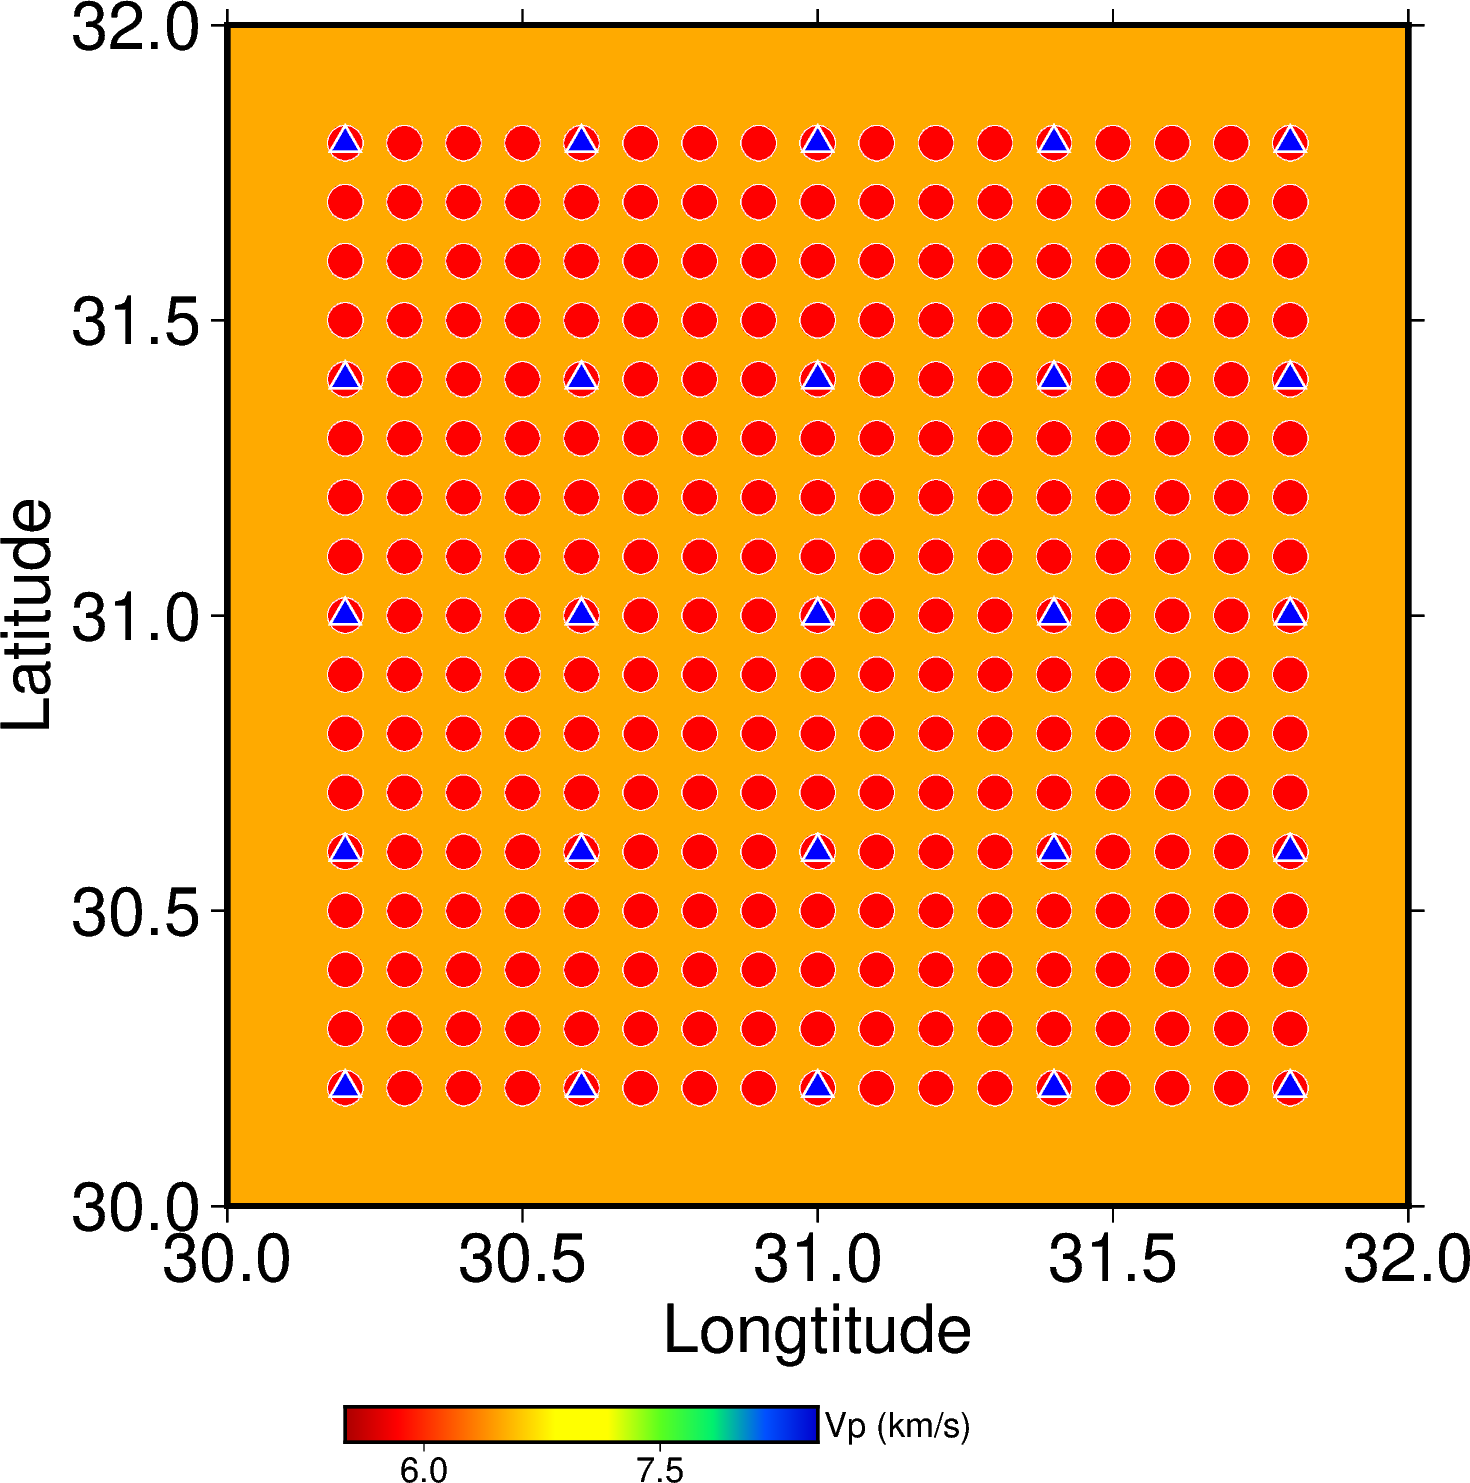

surface [WARNING]: 3280 unusable points were supplied; these will be ignored.
surface [WARNING]: You should have pre-processed the data with block-mean, -median, or -mode.
surface [WARNING]: Check that previous processing steps write results with enough decimals.
surface [WARNING]: Possibly some data were half-way between nodes and subject to IEEE 754 rounding.
surface [WARNING]: Input data lie exactly on a plane.


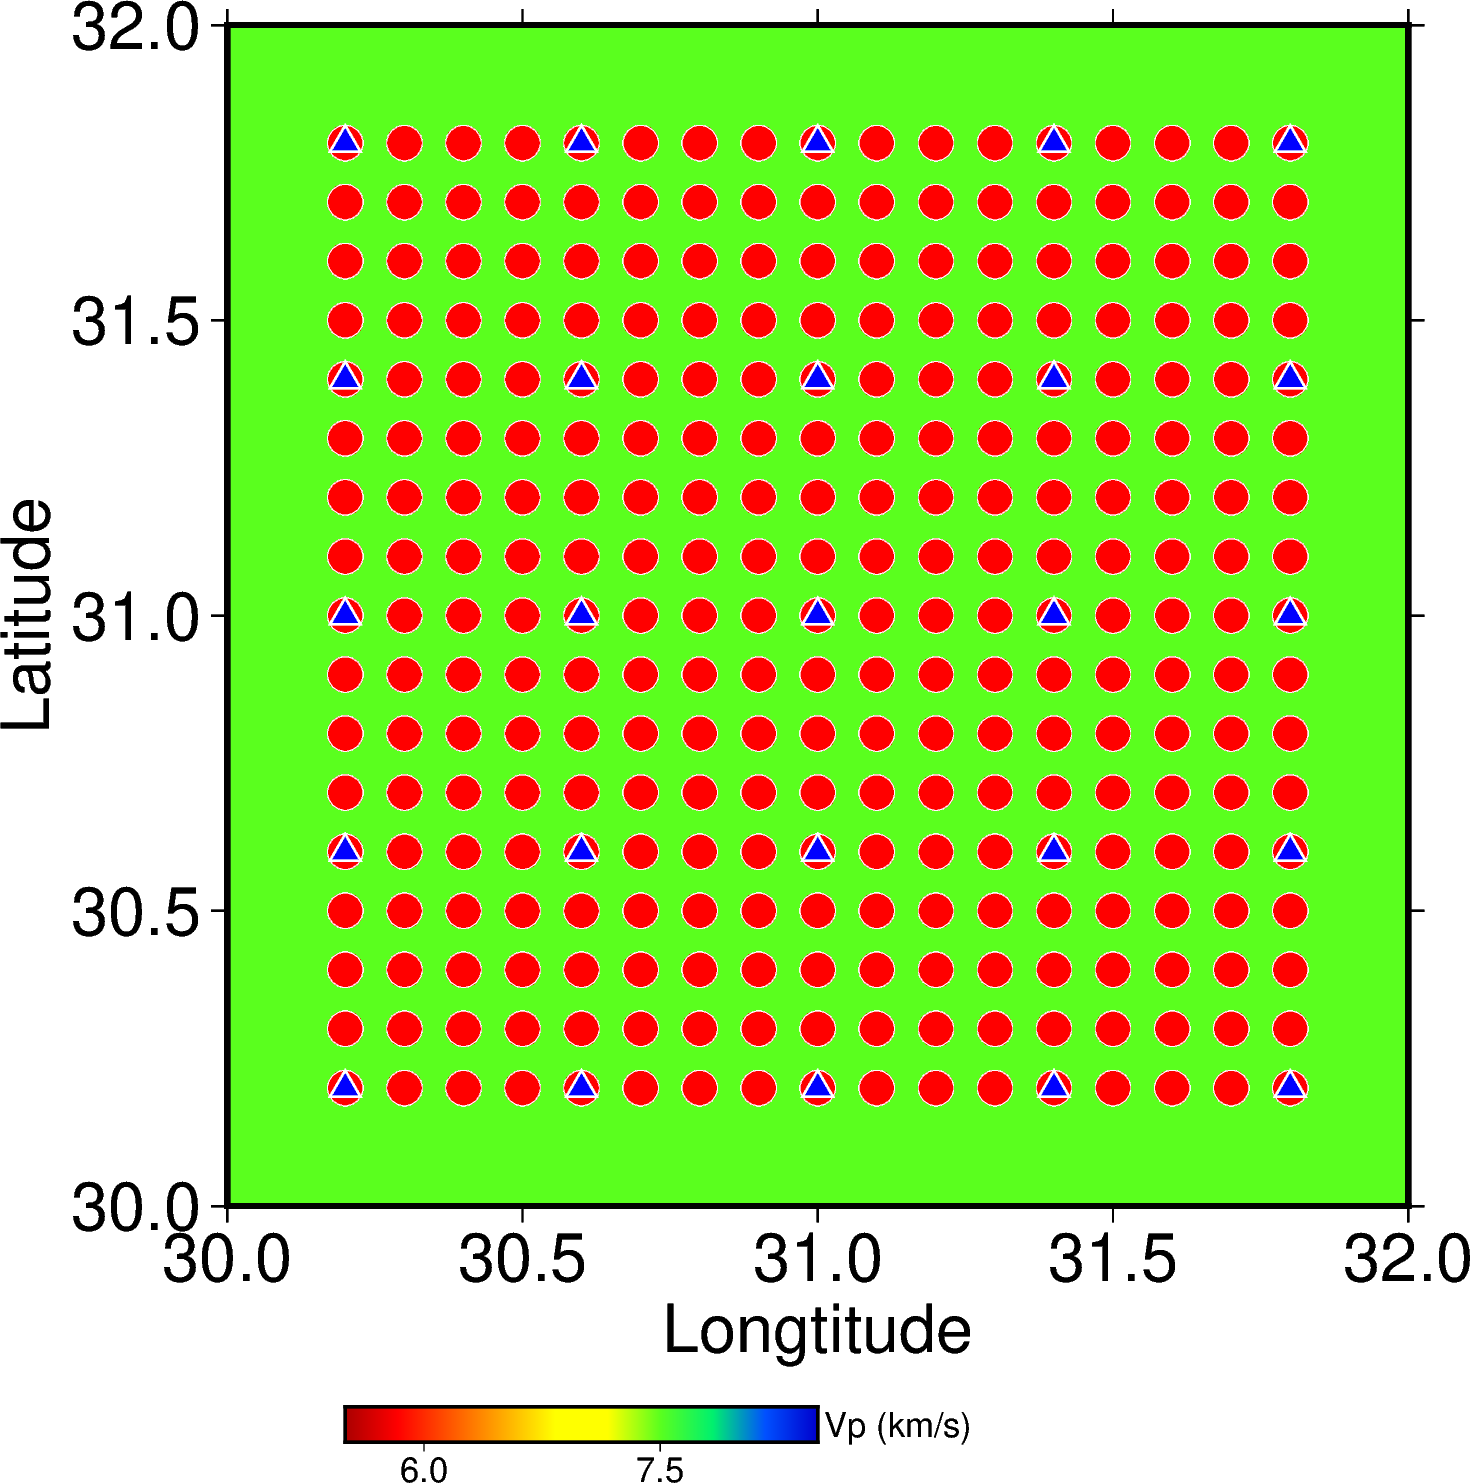

In [2]:
import sys
sys.path.append('../utils')
from functions_for_plot import plot_map
from pytomoatt.src_rec import SrcRec

# read src rec file
sr = SrcRec.read('../0_generate_files_for_TomoATT/1_src_rec_files/src_rec_config.dat')
station = sr.receivers[['stlo','stla']].values.T
earthquake = sr.sources[['evlo','evla']].values.T

dx = 0.1; dy = 0.1
for i, depth in enumerate(all_depth):
    lon = all_dep_sec[i][:, 0]
    lat = all_dep_sec[i][:, 1]
    vel = all_dep_sec[i][:, 2]
    fname = f'img/1a_initial_model_depth_{depth}.png'
    fig = plot_map(lon,lat,vel,dx,dy,
                fname       = fname, 
                station     = station,
                earthquake  = earthquake,
                axis_label  = ["Longtitude","Latitude"],
                colorbar    = "Vp (km/s)", 
                cpt_range   = [5.5,8.5])

surface [WARNING]: 7581 unusable points were supplied; these will be ignored.
surface [WARNING]: You should have pre-processed the data with block-mean, -median, or -mode.
surface [WARNING]: Check that previous processing steps write results with enough decimals.
surface [WARNING]: Possibly some data were half-way between nodes and subject to IEEE 754 rounding.
surface [WARNING]: Input data lie exactly on a plane.


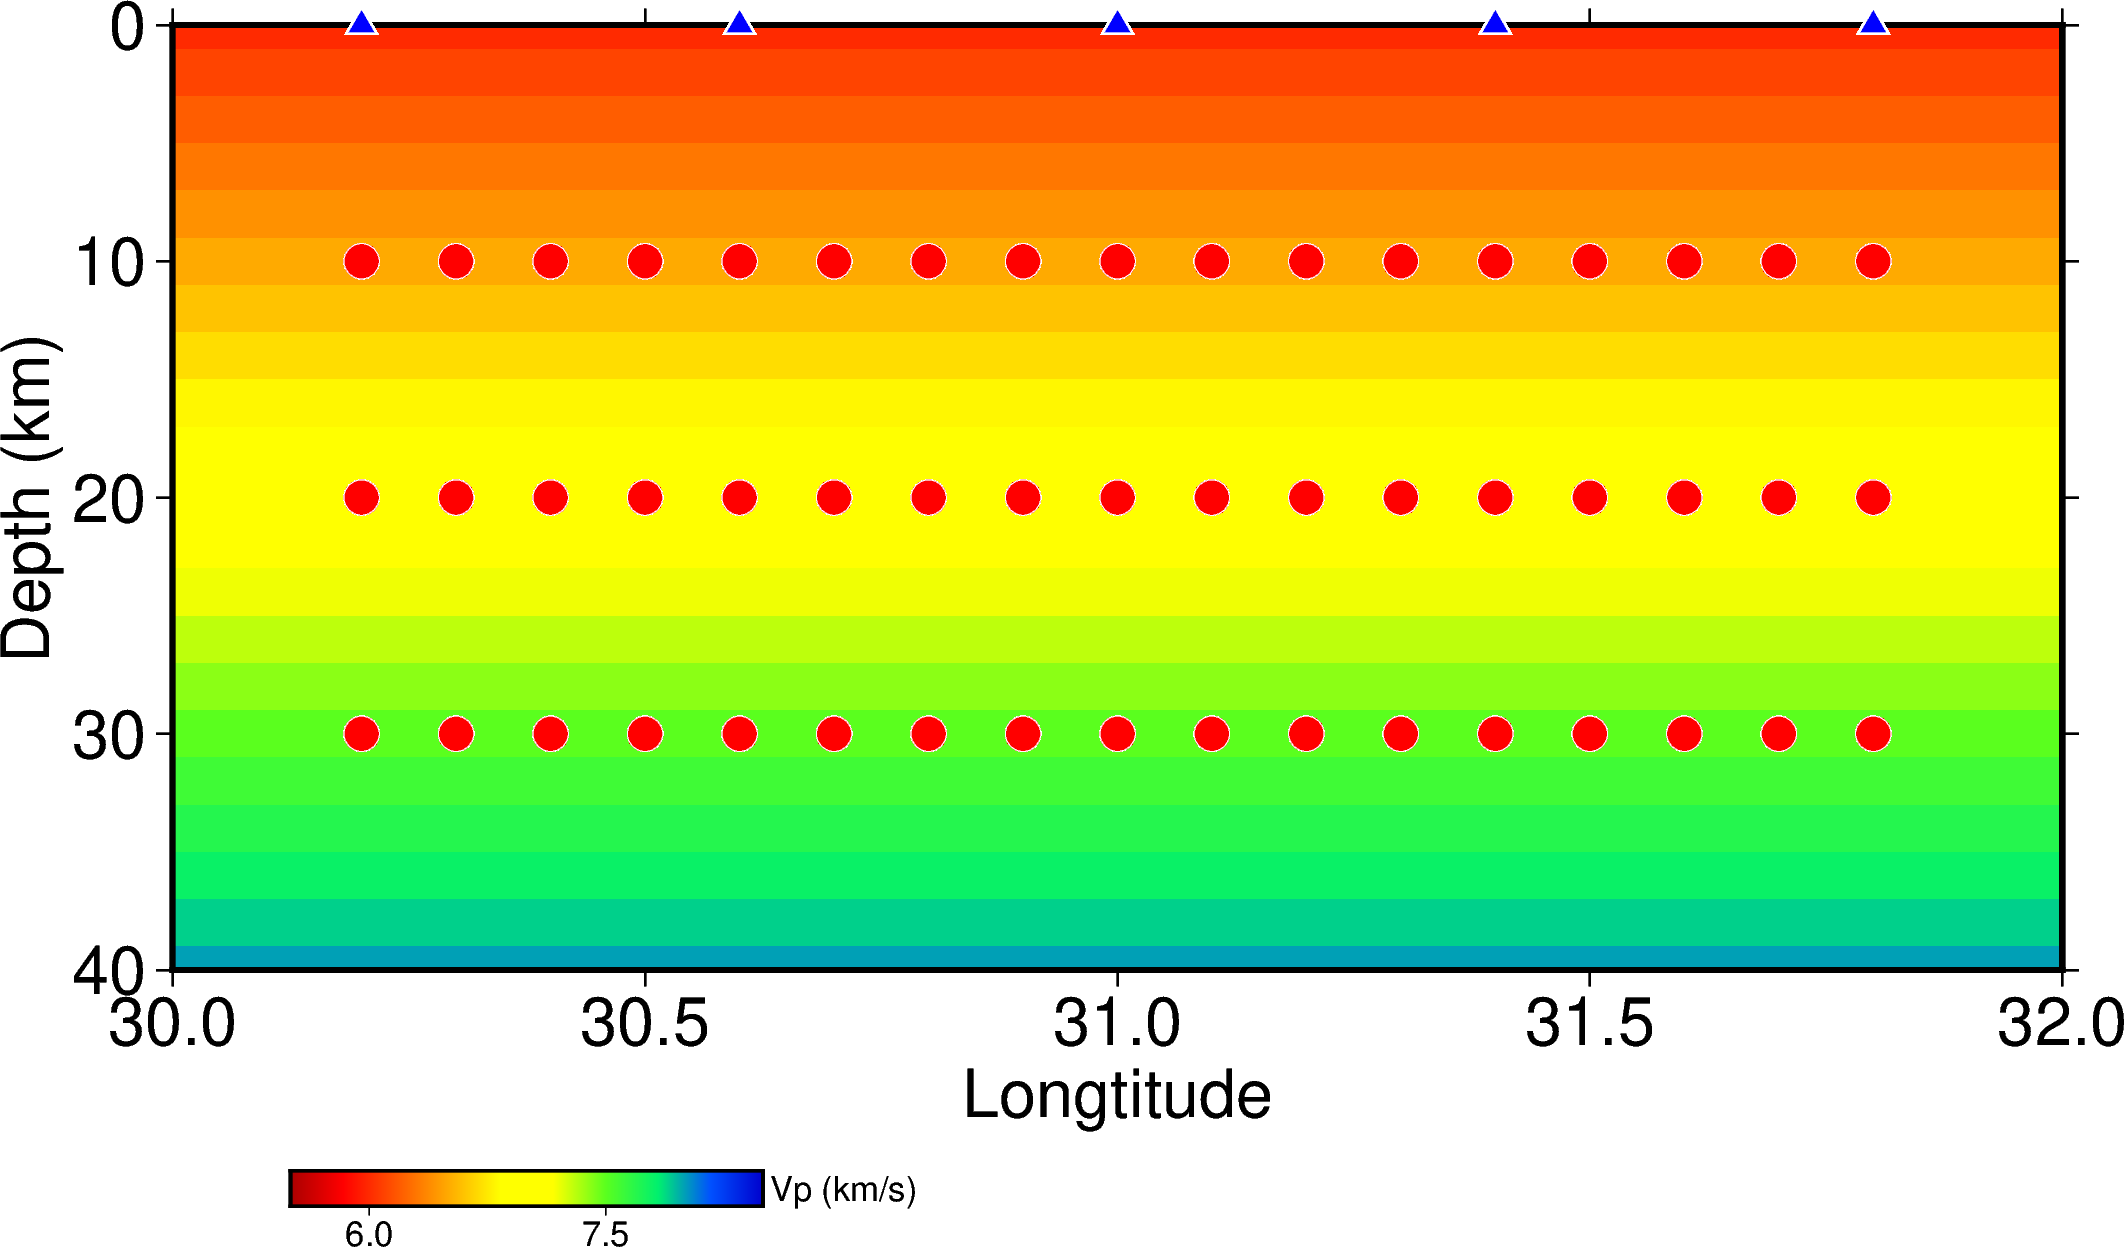

surface [WARNING]: 8841 unusable points were supplied; these will be ignored.
surface [WARNING]: You should have pre-processed the data with block-mean, -median, or -mode.
surface [WARNING]: Check that previous processing steps write results with enough decimals.
surface [WARNING]: Possibly some data were half-way between nodes and subject to IEEE 754 rounding.
surface [WARNING]: Input data lie exactly on a plane.


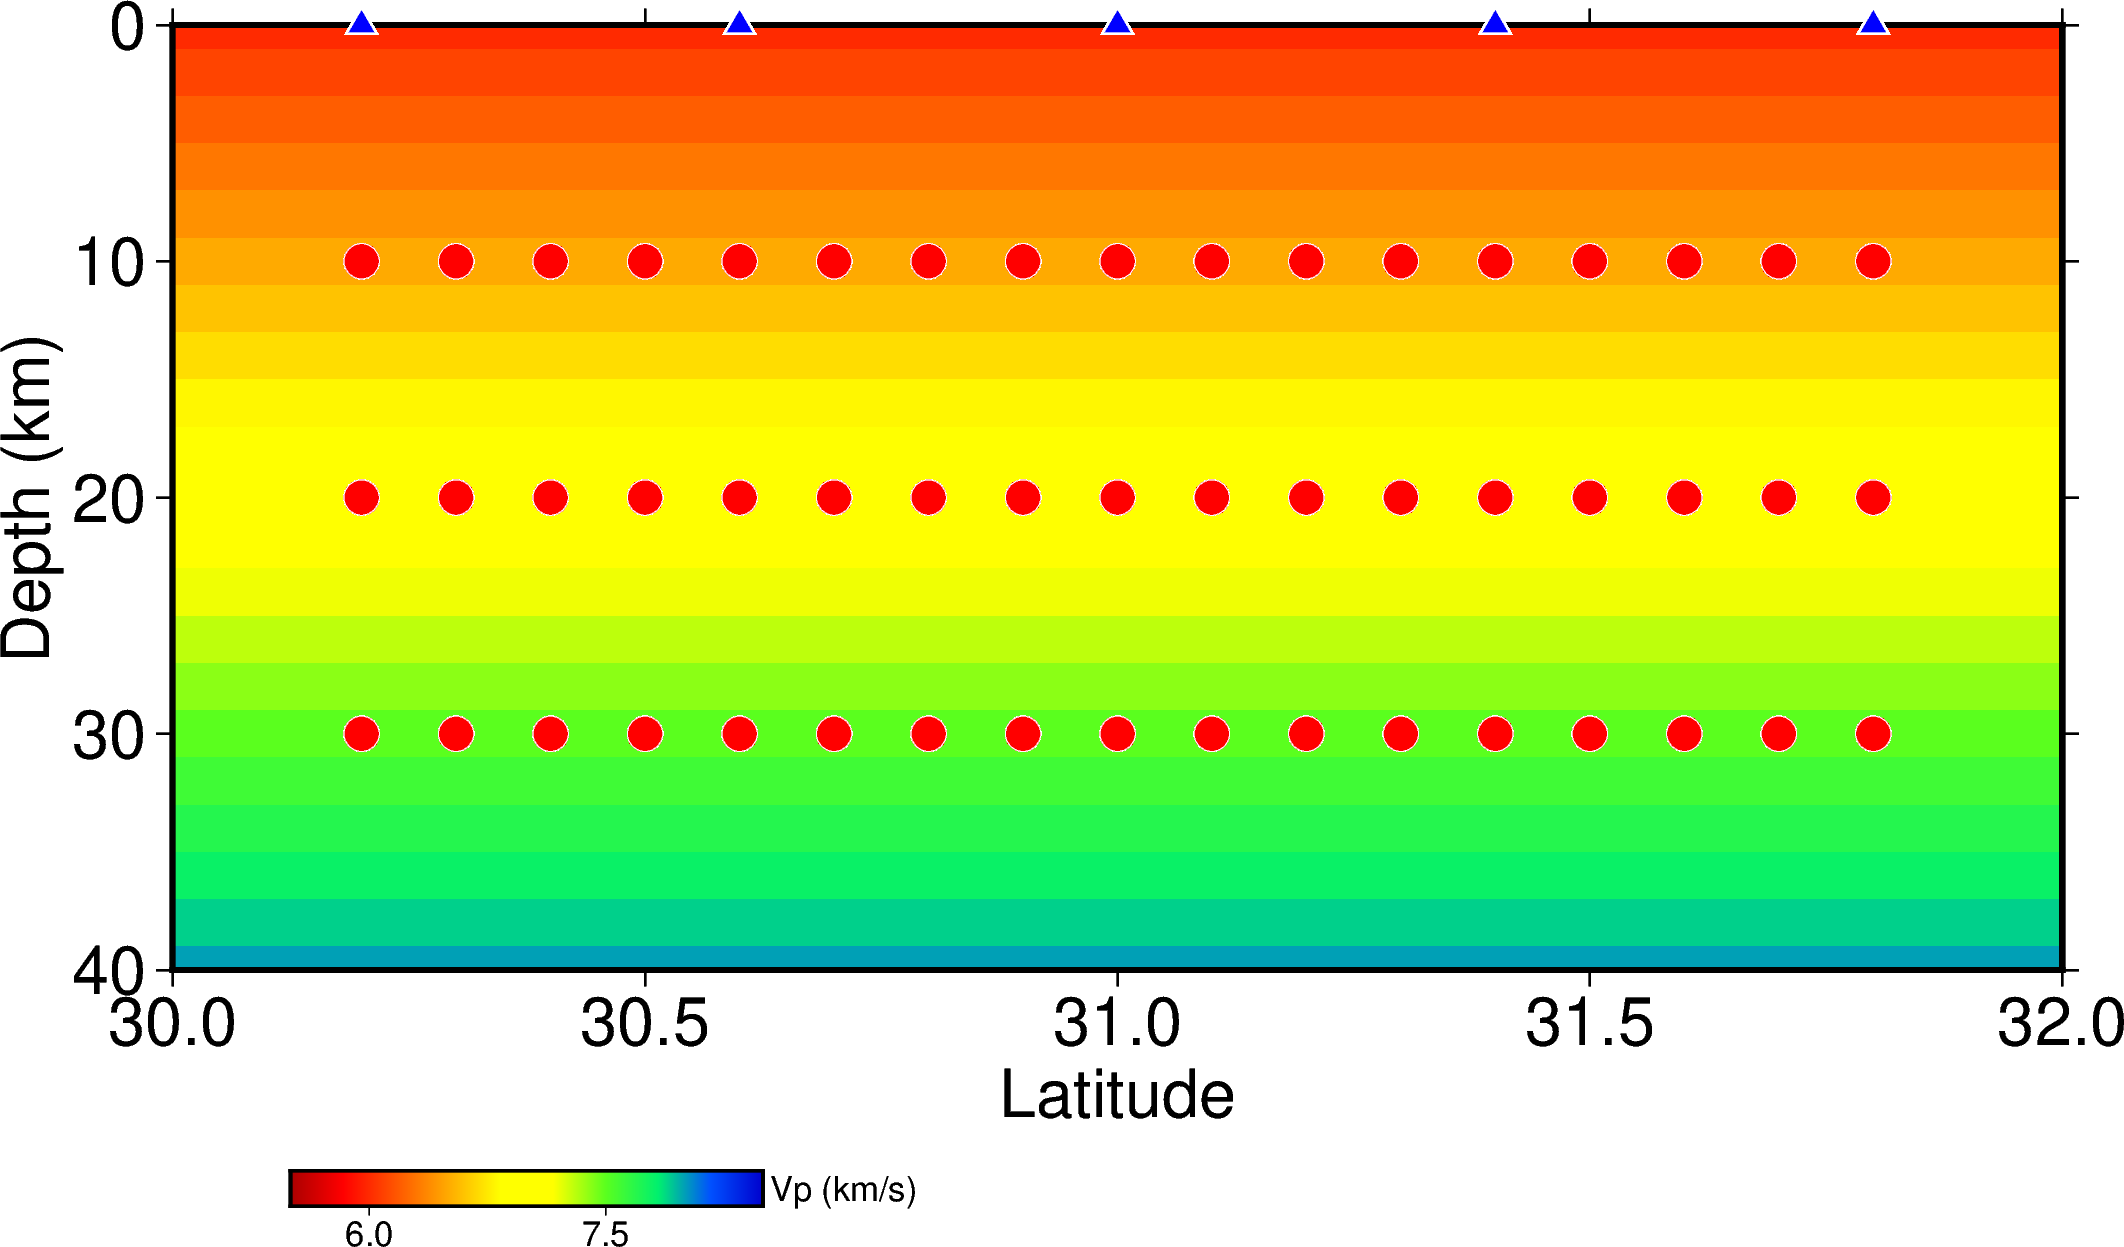

In [3]:

dx = 0.1; dy = 2
lon = sec_lon[0]
dep = sec_dep[0]
vel = sec_vel[0]
station = sr.receivers[['stlo','stel']].values.T
station[1] /= -1000
earthquake = sr.sources[['evlo','evdp']].values.T
fname = 'img/1a_initial_model_profile_1.png'
fig = plot_map(lon,dep,vel,dx,dy,
            fname       = fname, 
            station     = station,
            earthquake  = earthquake,
            region      = [30.0,32.0,0,40],
            fig_size    = [16, 8],
            axis_label  = ["Longtitude","Depth (km)"],
            colorbar    = "Vp (km/s)", 
            cpt_range   = [5.5,8.5],
            y_reverse   = True)

lat = sec_lat[1]
dep = sec_dep[1]
vel = sec_vel[1]
station = sr.receivers[['stla','stel']].values.T
station[1] /= -1000
earthquake = sr.sources[['evlo','evdp']].values.T
fname = 'img/1a_initial_model_profile_2.png'
fig = plot_map(lat,dep,vel,dx,dy,
            fname       = fname, 
            station     = station,
            earthquake  = earthquake,
            region      = [30.0,32.0,0,40],
            fig_size    = [16, 8],
            axis_label  = ["Latitude","Depth (km)"],
            colorbar    = "Vp (km/s)", 
            cpt_range   = [5.5,8.5],
            y_reverse   = True)